In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('Amazon Customer Behavior Survey.csv')
data = data.rename(columns = {
    'Purchase_Frequency':'Purch_Freq',
    'Browsing_Frequency':'Browse_Freq',
    'Purchase_Categories': 'Categ',
    'Personalized_Recommendation_Frequency' : 'Recom_Freq',
    'Cart_Completion_Frequency' : 'CCF',
    'Add_to_Cart_Browsing': 'Add'
})

print(data.columns)

Index(['Timestamp', 'age', 'Gender', 'Purch_Freq', 'Categ', 'Recom_Freq',
       'Browse_Freq', 'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add', 'CCF', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Frequency ',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')


In [19]:
#AWARENESS - Do people with personalized recommendations tend to browse the site more?
browse_unique = set()
for x in data['Browse_Freq']:
    if x not in browse_unique:
        browse_unique.add(x)

recom_unique = set()
for x in data['Recom_Freq']:
    if x not in recom_unique:
        recom_unique.add(x)

print(browse_unique)

{'Few times a month', 'Few times a week', 'Rarely', 'Multiple times a day'}


In [15]:
print(browse_unique)
print(recom_unique)

{'Few times a month', 'Few times a week', 'Rarely', 'Multiple times a day'}
{'Yes', 'No', 'Sometimes'}


In [29]:
#AWARENESS - Do people with personalized recommendations tend to browse the site more?

browse_segments = {}
for x in recom_unique:
    browse_segments[x] = data[data['Recom_Freq'] == x]
    
rows = []
for x in browse_segments:
    temp = []
    temp.append(x)
    for y in browse_unique:
        val = (browse_segments[x]['Browse_Freq'] == y).sum()
        temp.append(val)
    rows.append(temp)

print(rows)

[['Yes', 26, 61, 3, 32], ['No', 89, 95, 45, 22], ['Sometimes', 84, 93, 29, 23]]


In [107]:
main_df = pd.DataFrame(rows, columns = ['Personalized?'] + list(browse_unique))
main_df = main_df.set_index('Personalized?')
main_df

,Few times a month,Few times a week,Rarely,Multiple times a day
Personalized?,,,,
Yes,26,61,3,32
No,89,95,45,22
Sometimes,84,93,29,23


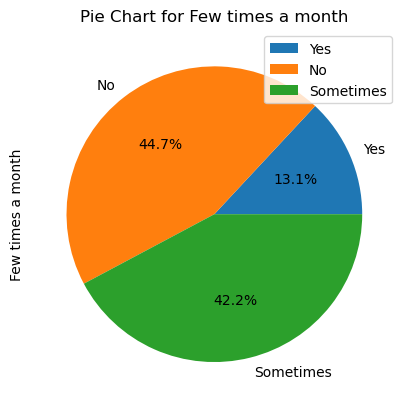

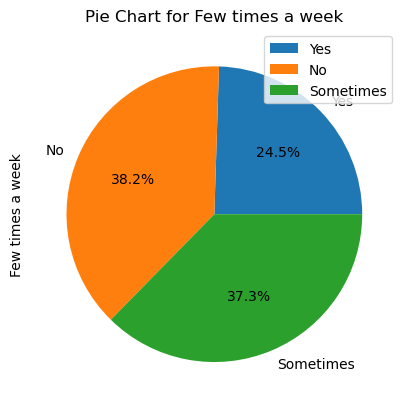

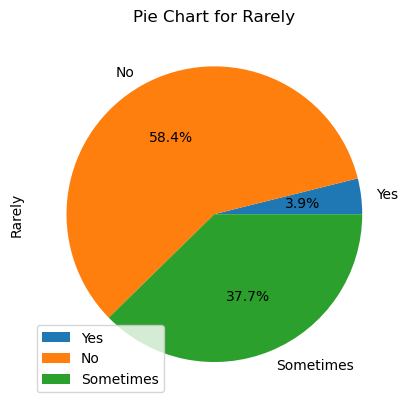

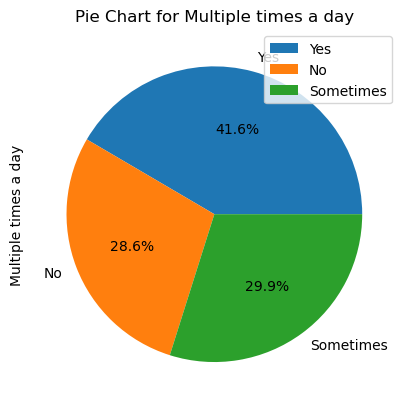

In [90]:
for x in browse_unique:
    main_df.plot.pie(y=x, autopct='%1.1f%%')
    plt.title(f'Pie Chart for {x}')

### Insight 1: 
#### Only 3.9% of people who rarely browse the app have personalized recommendations in their feed (vs. 41.9% of those who browse the app many times a day)

### People who have personalized recommendations tend to browse the app more (builds product awareness)

In [92]:
#CONSIDERATION - Does Awareness really translate to Consideration?

In [95]:
print(data.columns)

Index(['Timestamp', 'age', 'Gender', 'Purch_Freq', 'Categ', 'Recom_Freq',
       'Browse_Freq', 'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add', 'CCF', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Personalized_Recommendation_Frequency ',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas'],
      dtype='object')


In [98]:
add_possible = ['Yes', 'Maybe', 'No']

recom_segments = {}
for x in browse_unique:
    recom_segments[x] = data[data['Browse_Freq'] == x]
    
rows2 = []
for x in recom_segments:
    temp = []
    temp.append(x)
    for y in add_possible:
        count = (recom_segments[x]['Add'] == y).sum()
        temp.append(count)
    rows2.append(temp)

print(rows2)

[['Few times a month', 64, 87, 48], ['Few times a week', 94, 101, 54], ['Rarely', 23, 33, 21], ['Multiple times a day', 35, 27, 15]]


In [108]:
main2_df = pd.DataFrame(rows2, columns = ['Add2Cart?'] + add_possible)
main2_df = main2_df.set_index('Add2Cart?')
main2_df.T

Add2Cart?,Few times a month,Few times a week,Rarely,Multiple times a day
Yes,64,94,23,35
Maybe,87,101,33,27
No,48,54,21,15


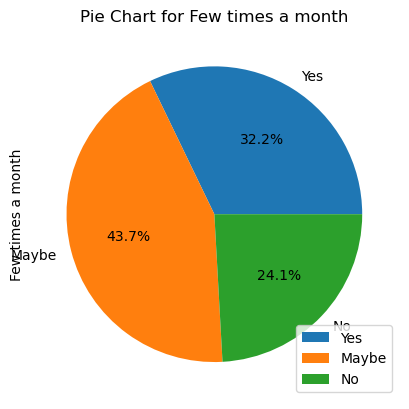

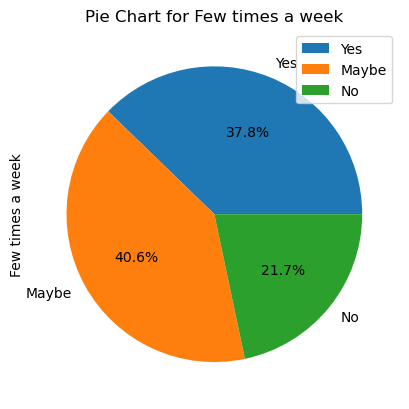

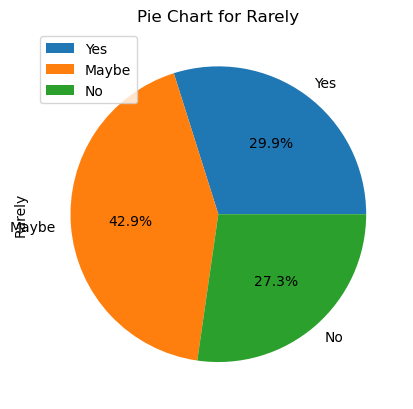

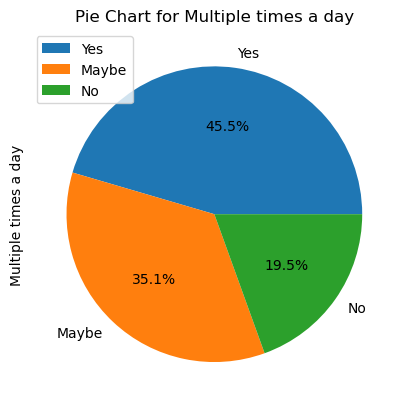

In [109]:
for x in browse_unique:
    main2_df.T.plot.pie(y=x, autopct='%1.1f%%')
    plt.title(f'Pie Chart for {x}')

## Insight 2: 
People who rarely browse are much less likely to add products to their cart (29.9%) vs. those who browse multiple times a day (45.5%). Likelihood of adding products to cart increases with browsing frequency.

### Consideration (add to cart likelihood) is a function of awareness (browsing frequency)

In [118]:
data['Categories'] = data['Categ'].str.split(';')
categ_expand = data.explode('Categories').reset_index(drop=True)

print(categ_expand)

                           Timestamp  age             Gender  \
0     2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1     2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2     2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3     2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
4     2023/06/04 5:13:00 PM GMT+5:30   24             Female   
...                              ...  ...                ...   
1153  2023/06/12 4:03:59 PM GMT+5:30   23             Female   
1154  2023/06/12 9:57:20 PM GMT+5:30   23             Female   
1155  2023/06/12 9:57:20 PM GMT+5:30   23             Female   
1156  2023/06/12 9:57:20 PM GMT+5:30   23             Female   
1157  2023/06/16 9:16:05 AM GMT+5:30   23             Female   

             Purch_Freq                                              Categ  \
0     Few times a month                           Beauty and Personal Care   
1          Once a month                               Clothing and Fashion 

In [120]:
# Which categories do people not have personalized recommendations?

categs = set()
for x in categ_expand['Categories']:
    if x not in categs:
        categs.add(x)

print(categs)

{'Beauty and Personal Care', 'Groceries and Gourmet Food', 'Home and Kitchen', 'Clothing and Fashion', 'others'}


In [122]:
categ_segments = {}
for x in categs:
    categ_segments[x] = categ_expand[categ_expand['Categories'] == x]

rows3 = []
for x in categ_segments:
    temp = []
    temp.append(x)
    for y in browse_segments:
        val = (categ_segments[x]['Recom_Freq'] == y).sum()
        temp.append(val)
    rows3.append(temp)

print(rows3)

[['Beauty and Personal Care', 79, 121, 118], ['Groceries and Gourmet Food', 36, 38, 37], ['Home and Kitchen', 43, 100, 77], ['Clothing and Fashion', 70, 146, 127], ['others', 33, 80, 53]]


In [128]:
main3_df = pd.DataFrame(rows3, columns = ['Category'] + list(browse_segments))
main3_df = main3_df.set_index('Category')
main3_df = main3_df.T
main3_df

Category,Beauty and Personal Care,Groceries and Gourmet Food,Home and Kitchen,Clothing and Fashion,others
Yes,79,36,43,70,33
No,121,38,100,146,80
Sometimes,118,37,77,127,53


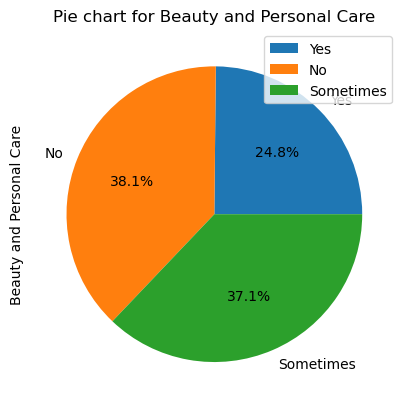

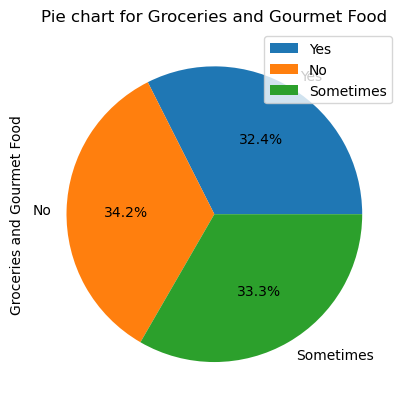

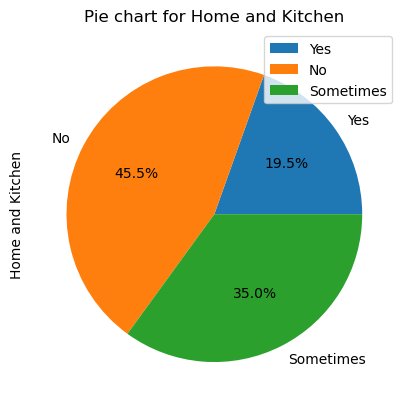

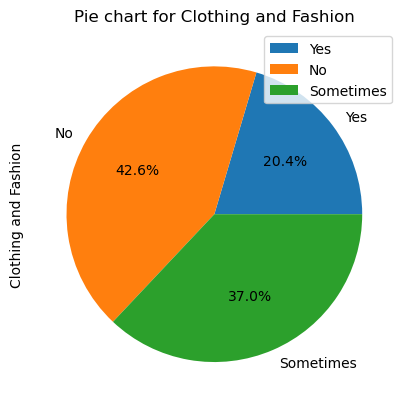

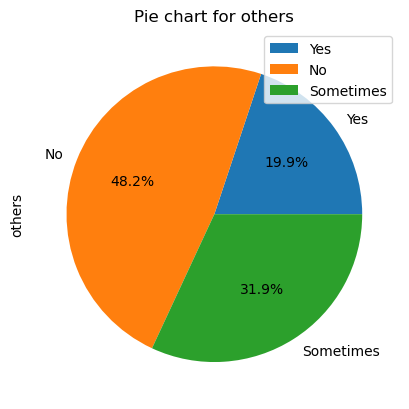

In [129]:
for x in categs:
    main3_df.plot.pie(y=x, autopct='%1.1f%%')
    plt.title(f'Pie chart for {x}')

### Insight 3: 
#### People who shop for Home and Kitchen products are the least likely to have personalized recommendations (19.5%), vs. the category with the highest likelihood (32.4%), Groceries and Gourmet Food